#Load_boston()

##1. Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##2. Cargar la base de datos


In [ ]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

##3. Conociendo los datos que contiene el dataset


In [ ]:
print(boston_dataset.keys())
datasets = boston_dataset.DESCR
print(boston_dataset.data)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


##4. Creamos una tabla de datos usando pandas

In [ ]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


##5. Agregamos en la tabla los valores de target del dataset

In [ ]:
boston['MEDV'] = boston_dataset.target
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


##6. Graficando los datos del dataset

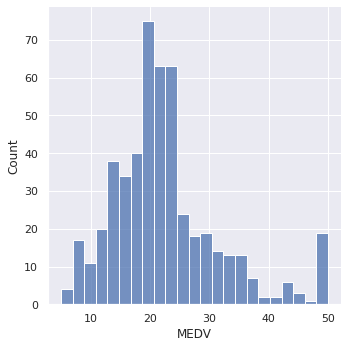

In [ ]:
sns.set(rc={'figure.figsize': (11.7,8.27)})
sns.displot(boston['MEDV'])
plt.show()

##7. Matriz de correlación de características

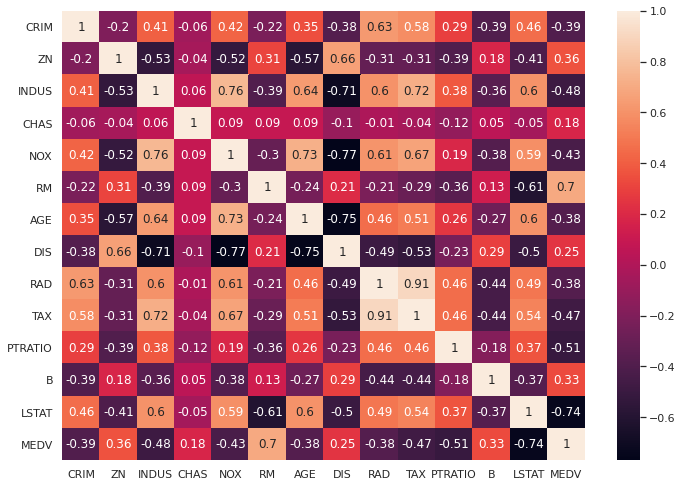

In [ ]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

##8. Graficando todas las variables

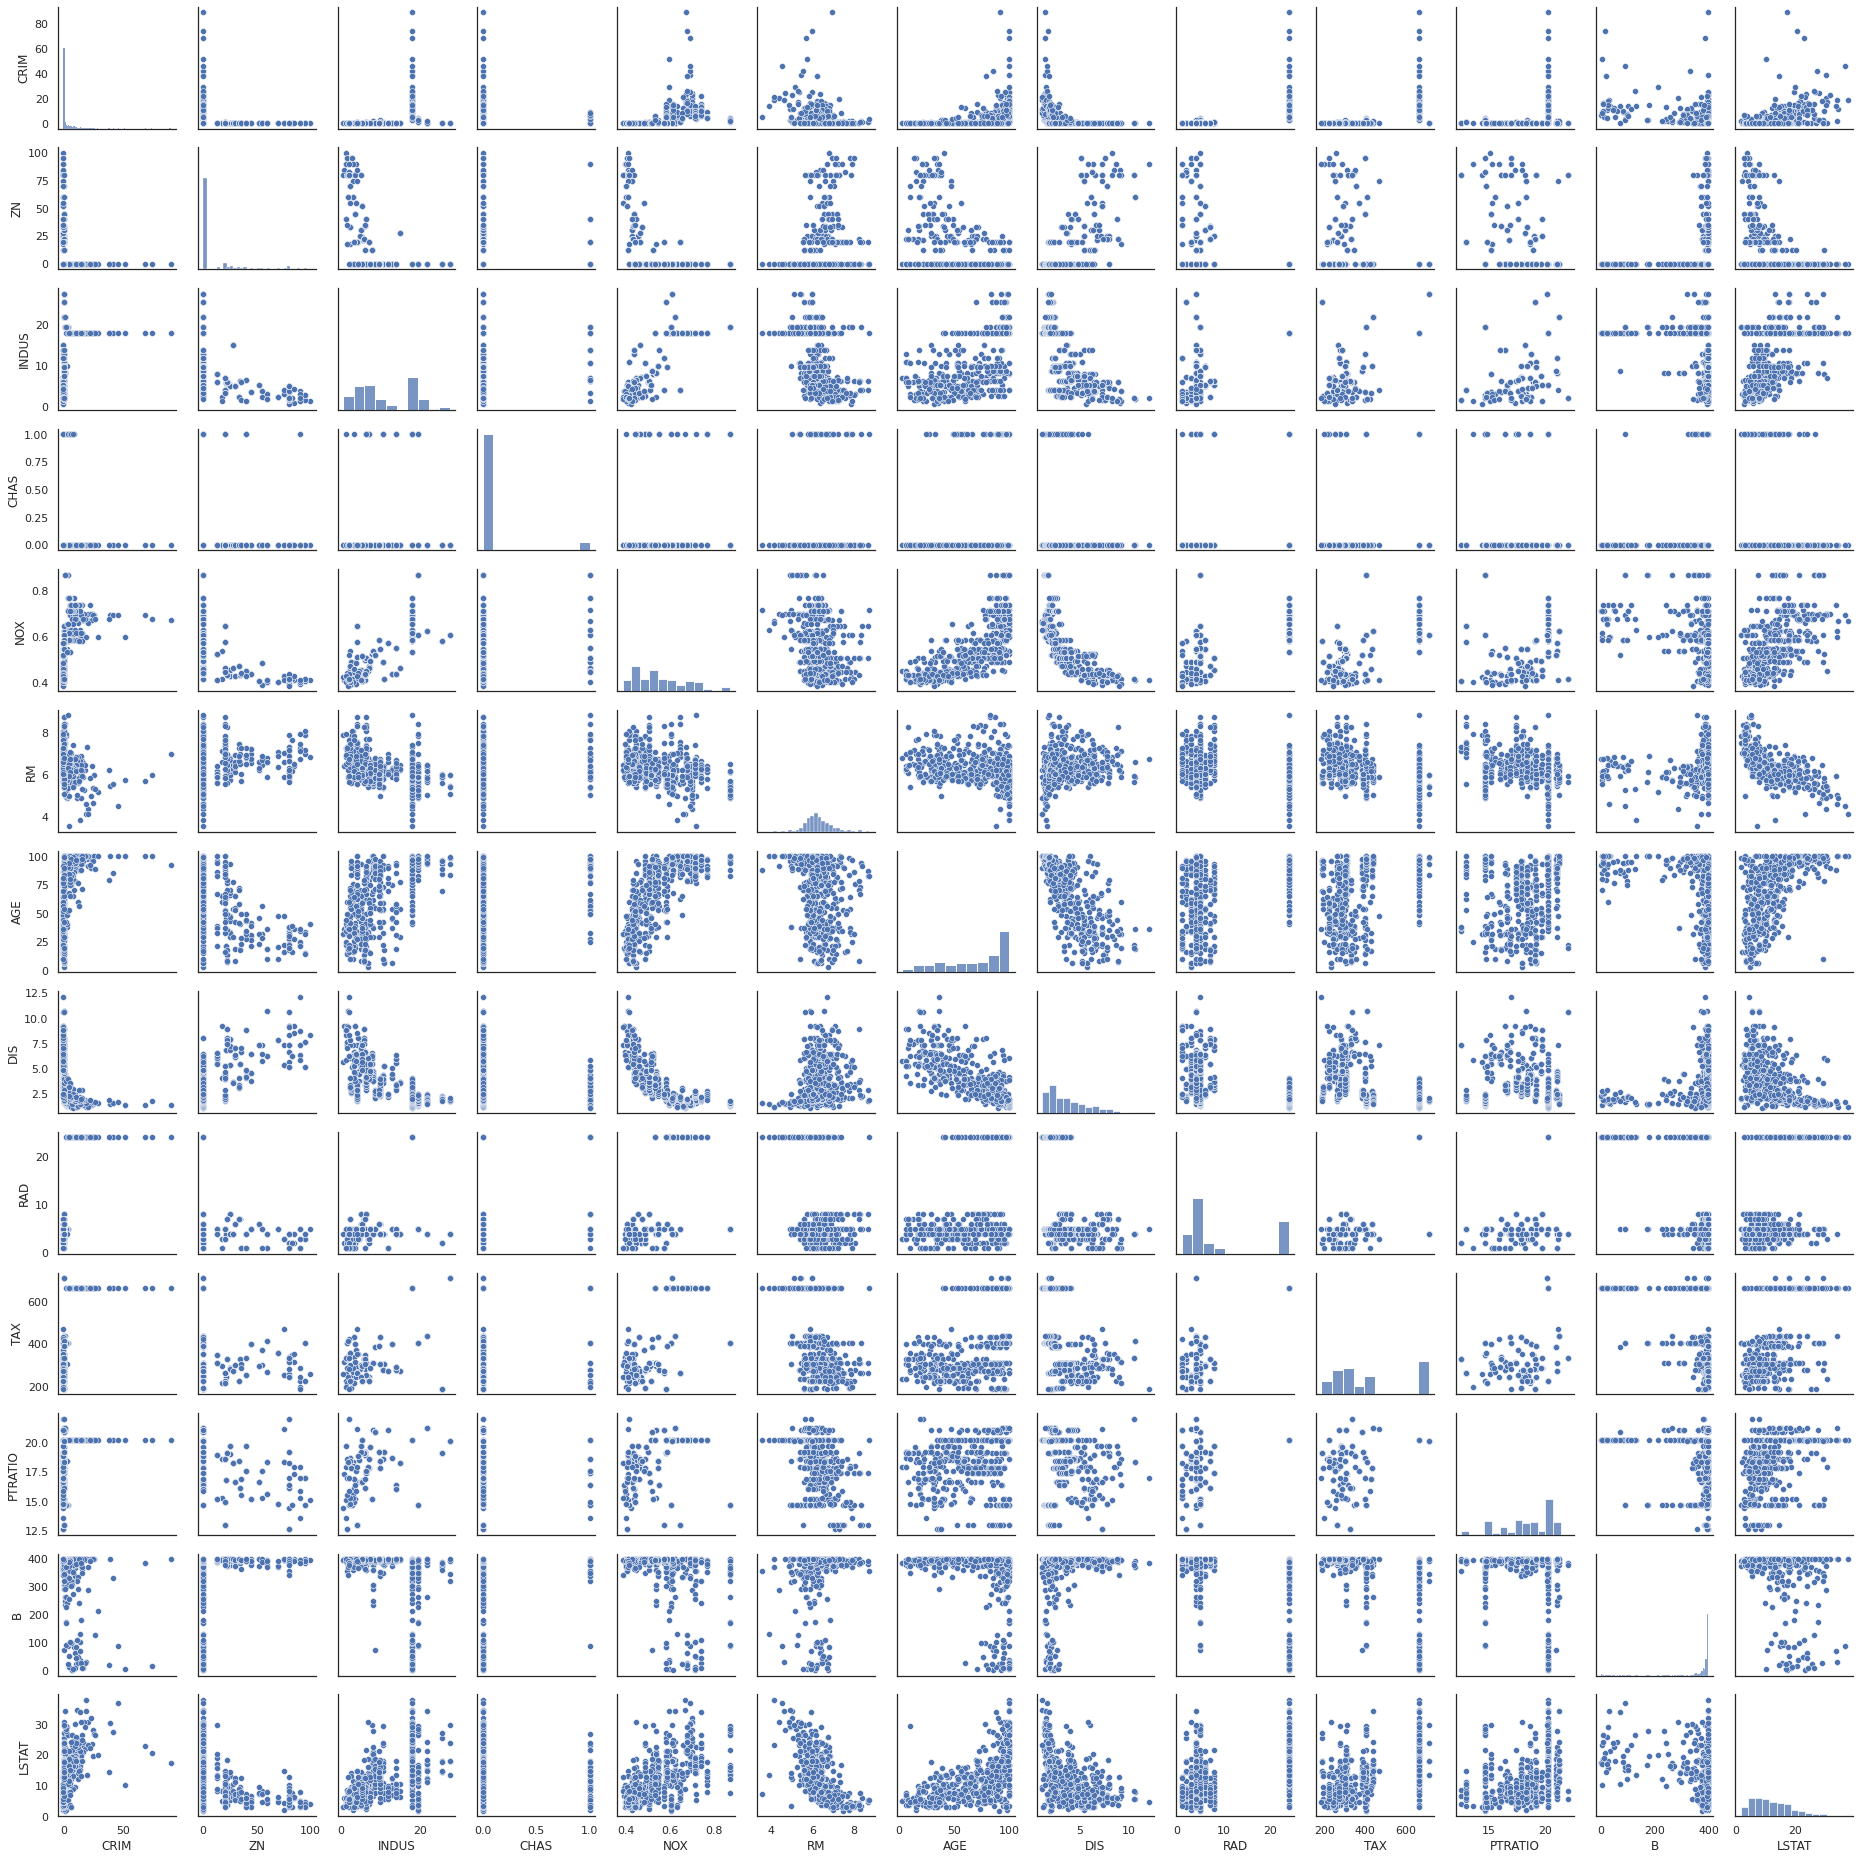

In [ ]:
sns.set(style='white', context='notebook')
features_plot = boston_dataset.feature_names
sns.pairplot(boston[features_plot], height=2.0)
plt.tight_layout()
plt.show()

##9. Graficando variables seleccionadas

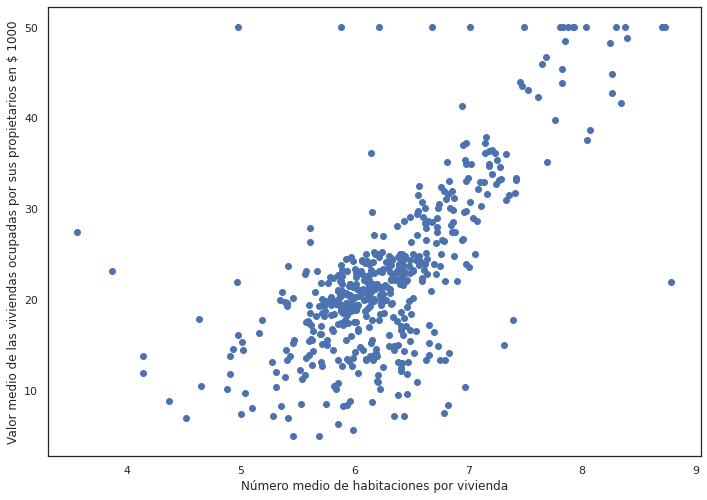

In [ ]:
x = boston['RM']
y = boston['MEDV']
plt.scatter(x, y)
plt.xlabel('Número medio de habitaciones por vivienda')
plt.ylabel('Valor medio de las viviendas ocupadas por sus propietarios en $ 1000')
plt.show()

##10. Preparación de datos para el entrenamiento del modelo

In [ ]:
x_axis = pd.DataFrame(np.c_[boston['RAD'], boston['INDUS']], columns=['RAD', 'INDUS'])
y_axis = boston['TAX']

##11. Dividir los datos en conjuntos de entrenamiento 80% entrenamiento, 20% pruebas

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_axis, y_axis, test_size=0.2)
print("x_80%: "+str(x_train.shape)+", x_20% "+str(x_test.shape))
print("y_80%: "+str(y_train.shape)+", y_20% "+str(y_test.shape))

x_80%: (404, 2), x_20% (102, 2)
y_80%: (404,), y_20% (102,)


##12. Entrenando un modelo de regresión lineal

In [ ]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##13. Evaluación del modelo

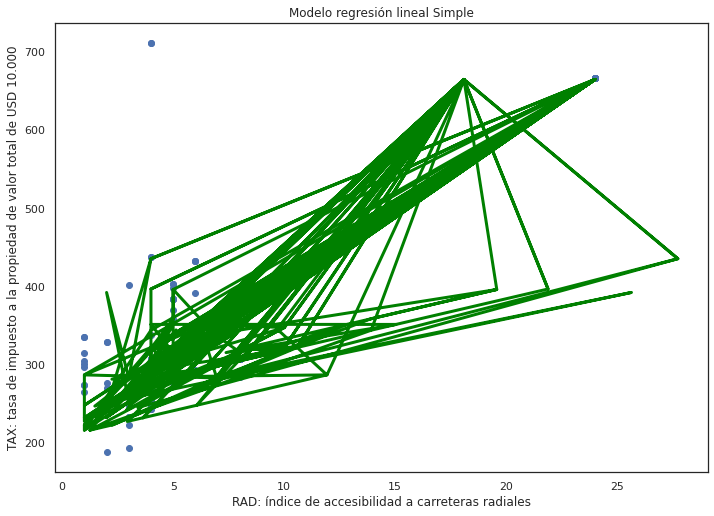

Precisión del modelo de regresión lineal: 
0.8832369973179512


In [ ]:
y_prediction = linear_model.predict(x_test)
plt.scatter(x_test['RAD'], y_test)
plt.plot(x_test, y_prediction, color='green', linewidth=3)
plt.title('Modelo regresión lineal Simple')
plt.xlabel('RAD: índice de accesibilidad a carreteras radiales')
plt.ylabel('TAX: tasa de impuesto a la propiedad de valor total de USD 10.000')
plt.show()
print('Precisión del modelo de regresión lineal: ')
print(linear_model.score(x_train, y_train))
